In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
path = os.getcwd() + '/ex2data2.txt'  
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])  

In [2]:
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
data.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


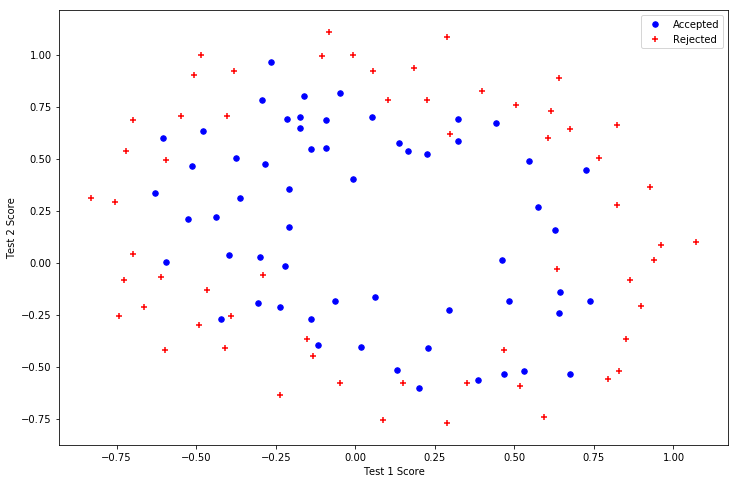

In [4]:
positive = data[data['Accepted'].isin([1])]  
negative = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Test 1'], positive['Test 2'], s=30, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=30, c='r', marker='+', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

In [5]:
deg = 5
x1 = data['Test 1']
x2 = data['Test 2']

data.insert(3, 'Ones', 1)

for i in range(deg):
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        
data.drop('Test 1', axis=1, inplace=True)  
data.drop('Test 2', axis=1, inplace=True)

data.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [6]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

def cost(theta, X, y, lam):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lam / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(first - second) / (len(X)) + reg

def gradient(theta, X, y, lam):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((lam / len(X)) * theta[:,i])

    return grad

In [7]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]  
X = data.iloc[:,1:cols]  
y = data.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(11)

lam = 0
cost(theta, X, y, lam)  

0.6931471805599454

In [9]:
from scipy import optimize as opt
res = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y, lam))  
h = np.matrix(res[0])